#ANALIZA

kle das opis

poves iz kje pobiras dol pa kaj pa eni so vekrat napisani k so pr vec ekipah

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
plt.style.use("ggplot")

nba = pd.read_csv('NBA.csv', encoding="utf-8", index_col="Rk")
nba = nba.drop_duplicates(keep=False)       #da se zbisejo une vrstice
nba

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,PF-C,24,TOT,74,18,1624,235,469,.501,...,.616,191,296,487,97,46,68,83,143,565
1,Precious Achiuwa,C,24,TOR,25,0,437,78,170,.459,...,.571,50,86,136,44,16,12,29,40,193
1,Precious Achiuwa,PF,24,NYK,49,18,1187,157,299,.525,...,.643,141,210,351,53,30,56,54,103,372
2,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,.521,...,.755,159,578,737,278,81,66,162,159,1367
3,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,.411,...,.661,74,142,216,83,47,44,64,117,455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,Thaddeus Young,PF,35,PHO,10,0,89,11,21,.524,...,.333,17,11,28,7,5,2,4,11,23
569,Trae Young,PG,25,ATL,54,54,1942,433,1008,.430,...,.855,23,126,149,583,72,11,235,109,1389
570,Omer Yurtseven,C,25,UTA,48,12,545,99,184,.538,...,.679,72,136,208,29,8,18,37,52,222


zbrisemo te stolpce kr bomo pol mogoc to sami zracunal pa se une vrstice k majo tisti k so pr vec ekipah

In [4]:
nba = nba.drop(columns=["FG%", "3P%", "2P%", "eFG%", "FT%"])
nba = nba[nba["Tm"].str.contains("TOT") == False]

mormo popraut podatke kr ce ne nc ne dela

In [5]:
NUMERIC_COLS = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 
       '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

nba_num = nba[NUMERIC_COLS]

nba_num = nba_num.apply(pd.to_numeric, errors='coerce').fillna(nba_num) # pretvorimo numerične iz str v stevilke



# dodamo numerične nazaj
nba[NUMERIC_COLS] = nba_num 

nba.dtypes

Player    object
Pos       object
Age        int64
Tm        object
G          int64
GS         int64
MP         int64
FG         int64
FGA        int64
3P         int64
3PA        int64
2P         int64
2PA        int64
FT         int64
FTA        int64
ORB        int64
DRB        int64
TRB        int64
AST        int64
STL        int64
BLK        int64
TOV        int64
PF         int64
PTS        int64
dtype: object

zdej je kul tkoda loh normalno delamo naprej
najprej pogledamo kaj nm da top 10

In [6]:
nba.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,24,TOR,25,0,437,78,170,13,...,42,50,86,136,44,16,12,29,40,193
1,Precious Achiuwa,PF,24,NYK,49,18,1187,157,299,13,...,70,141,210,351,53,30,56,54,103,372
2,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,15,...,387,159,578,737,278,81,66,162,159,1367
3,Ochai Agbaji,SG,23,UTA,51,10,1003,106,249,47,...,20,35,91,126,47,27,29,34,66,274
3,Ochai Agbaji,SG,23,TOR,27,18,638,72,184,15,...,36,39,51,90,36,20,15,30,51,181
4,Santi Aldama,PF,23,MEM,61,35,1618,247,568,106,...,87,72,280,352,138,43,54,69,89,654
5,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,131,...,65,35,132,167,204,64,42,76,143,655
6,Grayson Allen,SG,28,PHO,75,74,2513,340,682,205,...,147,48,247,295,227,69,45,95,157,1014
7,Jarrett Allen,C,25,CLE,77,77,2442,519,819,0,...,314,243,568,811,210,53,81,121,147,1271


vidmo da so urejeni po abecedi kar nm nc ne pomaga tkoda jih razvrstimo po tockah

In [7]:
urejeni_tocke = nba.sort_values(['PTS'], ascending=False).head(15)
urejeni_tocke[["Player", "PTS", "Tm"]]

,Player,PTS,Tm
Rk,,,
128,Luka Dončić,2370,DAL
172,Shai Gilgeous-Alexander,2254,OKC
11,Giannis Antetokounmpo,2222,MIL
76,Jalen Brunson,2212,NYK
263,Nikola Jokić,2085,DEN
140,Anthony Edwards,2049,MIN
137,Kevin Durant,2032,PHO
489,Jayson Tatum,1987,BOS
155,De'Aaron Fox,1966,SAC


poglejmo keri majo trojke >= neki  pa jih uredmo od najmlajsiga gor

In [8]:
urejene_trojke = nba[nba["3P"] >= 210].sort_values("Age")
urejene_trojke[['Player','3P','Age']]

,Player,3P,Age
Rk,,,
324,Tyrese Maxey,212,23
128,Luka Dončić,284,24
489,Jayson Tatum,229,25
406,Michael Porter Jr.,220,25
155,De'Aaron Fox,214,26
38,Malik Beasley,224,27
61,Mikal Bridges,220,27
76,Jalen Brunson,211,27
442,D'Angelo Russell,226,27


pogledamo keri igralci so u tej sezoni igral za dallas in jih razvrstimo po minutah na igriscu na tekmo to morm ugotovit se kako

In [9]:
mavs = nba[nba['Tm'].str.contains('DAL')]
mavs_urejeno = mavs.sort_values("MP", ascending=False)
mavs_urejeno[["Player", "MP"]]

,Player,MP
Rk,,
128,Luka Dončić,2624
198,Tim Hardaway Jr.,2120
239,Kyrie Irving,2030
266,Derrick Jones Jr.,1783
189,Josh Green,1505
300,Dereck Lively II,1294
549,Grant Williams,1242
146,Dante Exum,1088
200,Jaden Hardy,989


pogledamo kako so razporejeni po starostih

Text(0.5, 1.0, 'Igralci po starosti')

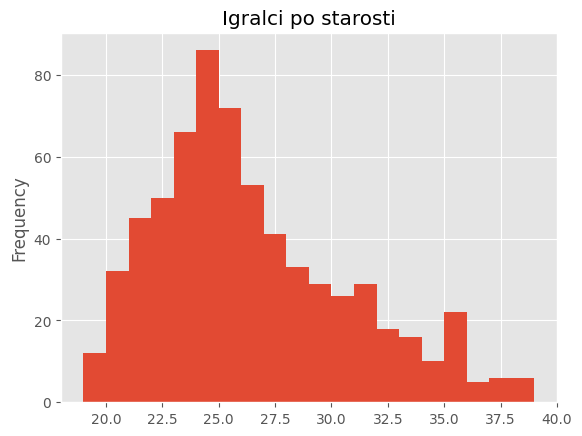

In [10]:
nba["Age"].plot.hist(bins=20)
#plt.xticks(np.arange(0,10))
plt.title("Igralci po starosti")

Text(0.5, 1.0, 'Razmerje med številom osebnih napak in minutah na igrišču')

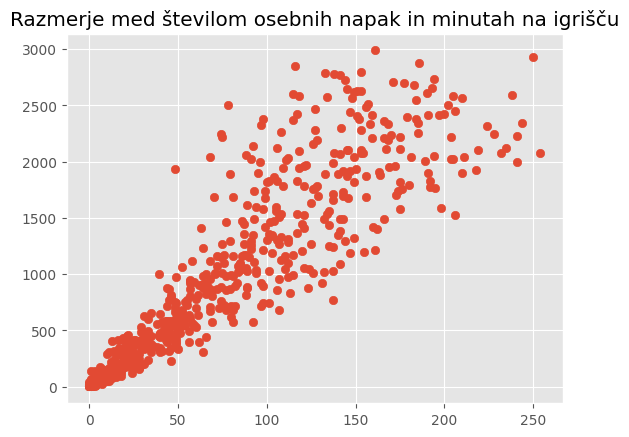

In [11]:
plt.scatter(nba["PF"], nba["MP"])
plt.title("Razmerje med številom osebnih napak in minutah na igrišču")

In [12]:
#ns.lineplot(x='Date', y='Euro rate', data=df, hue='Currency')

56462


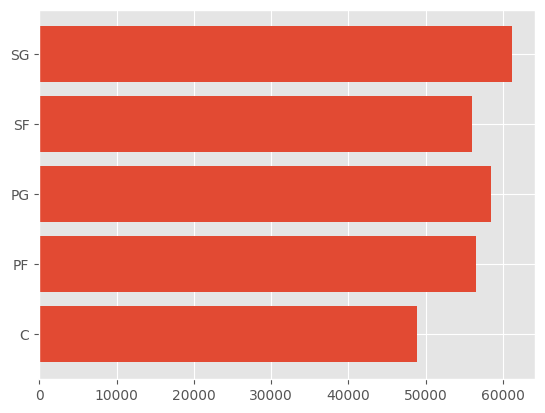

In [35]:
pozicije = nba["Pos"]
pozicije = set(pozicije)
pozicije

def tocke(poz): 
    ustrezne_vrstice = nba[nba["Pos"] == poz]  
    skupne_tocke_na_pozicijo = ustrezne_vrstice["PTS"].sum()  
    return skupne_tocke_na_pozicijo



print(tocke("PF"))




x = np.array(["C", "PF", "PG", "SF", "SG"])
y = np.array([tocke("C"), tocke("PF"), tocke("PG"), tocke("SF"), tocke("SG")])

plt.barh(x, y)
plt.show() 